In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline
#To display full output.
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

    

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  # This is added back by InteractiveShellApp.init_path()


In [42]:
df=pd.read_csv("train.csv")
df.shape
##REmoving irrelevant columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

**Editing categorical variables as given in the decription.** 

In [43]:
df["Alley"].fillna("No Access", inplace = True)
df["FireplaceQu"].fillna("No Fireplace", inplace = True)
df["BsmtQual"].fillna("No Basement", inplace = True)
df["BsmtCond"].fillna("No Basement", inplace = True)
df["BsmtExposure"].fillna("No Basement", inplace = True)
df["BsmtFinType1"].fillna("No Basement", inplace = True)
df["BsmtFinType2"].fillna("No Basement", inplace = True)
df["GarageType"].fillna("No Garage", inplace = True)
df["GarageFinish"].fillna("No Garage", inplace = True)
df["GarageQual"].fillna("No Garage", inplace = True)
df["Fence"].fillna("No Fence", inplace = True)


In [44]:
df.head(3).T

,0,1,2
Id,1,2,3
MSSubClass,60,20,60
MSZoning,RL,RL,RL
LotFrontage,65,80,68
LotArea,8450,9600,11250
Street,Pave,Pave,Pave
Alley,No Access,No Access,No Access
LotShape,Reg,Reg,IR1
LandContour,Lvl,Lvl,Lvl
Utilities,AllPub,AllPub,AllPub


In [45]:

print(df['SalePrice'].describe())
#Numeric columns 
num=df.select_dtypes(include=['int64','float64'])
print(num.columns)

count    1460.000000  
mean     180921.195890
std      79442.502883 
min      34900.000000 
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64
Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')


Looking and treating outliers in the dataset.

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1559: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f = plt.figure(figsize=(height, height))
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1559: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f = plt.figure(figsize=(height, height))
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1559: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume

<Figure size 432x288 with 0 Axes>

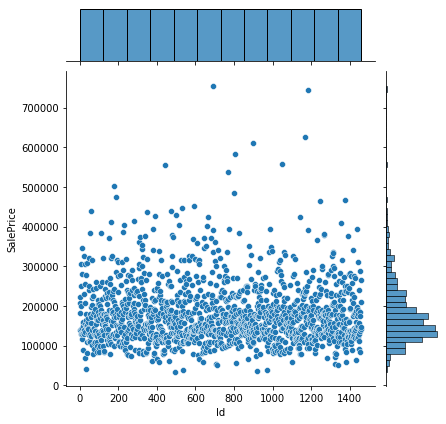

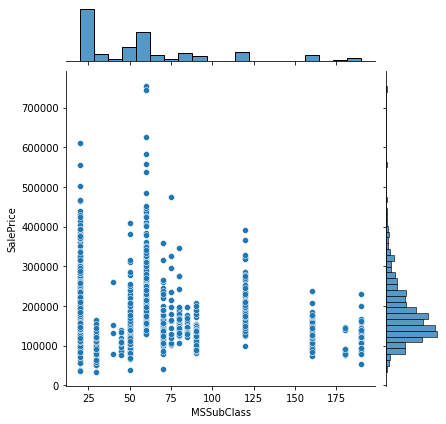

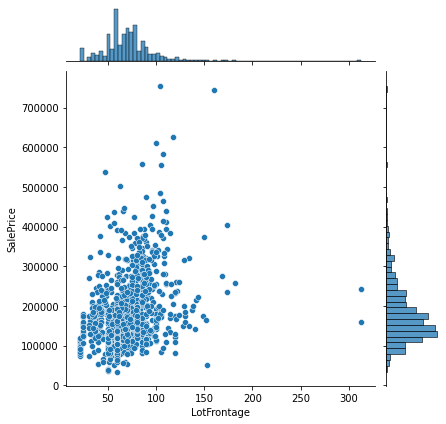

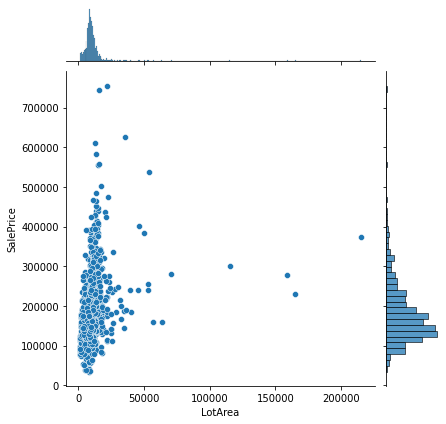

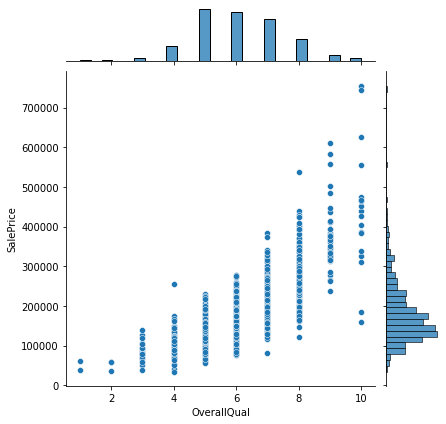

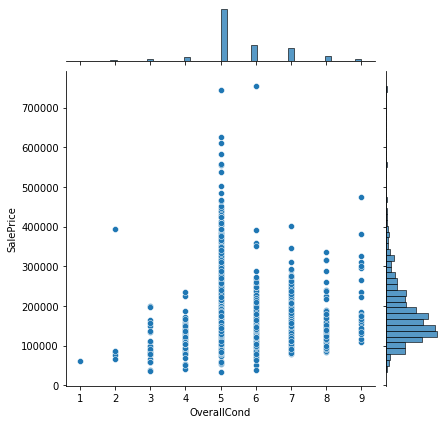

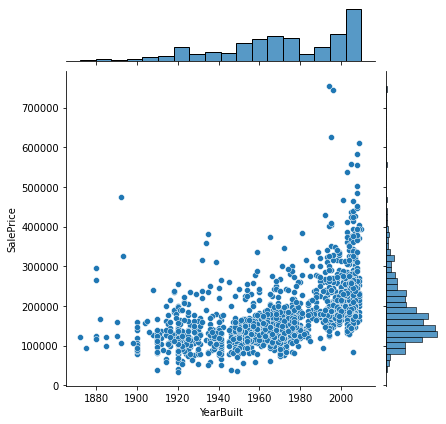

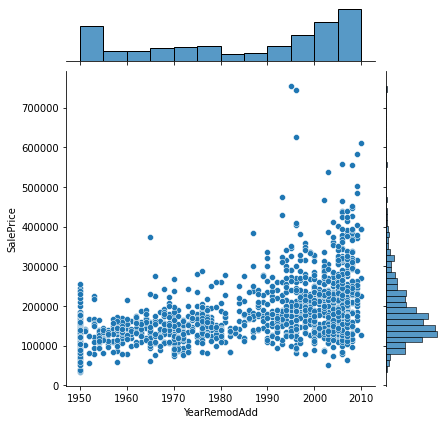

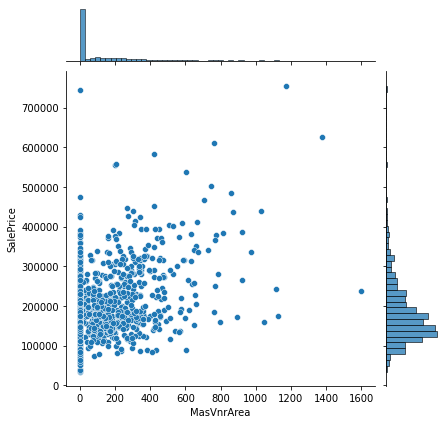

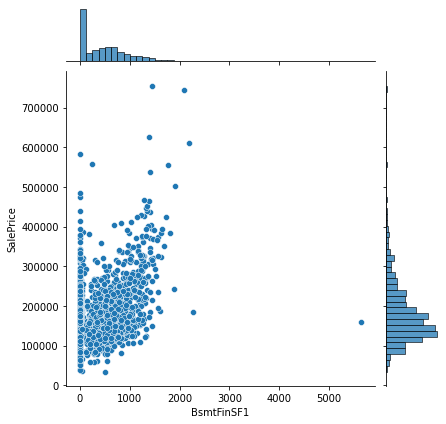

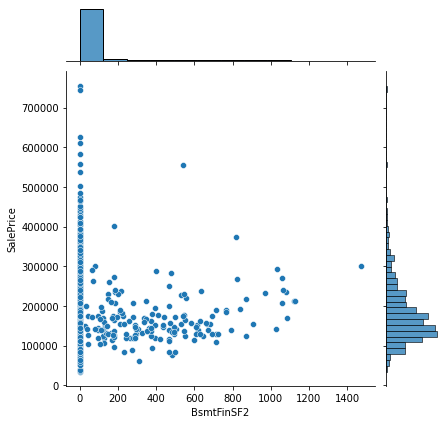

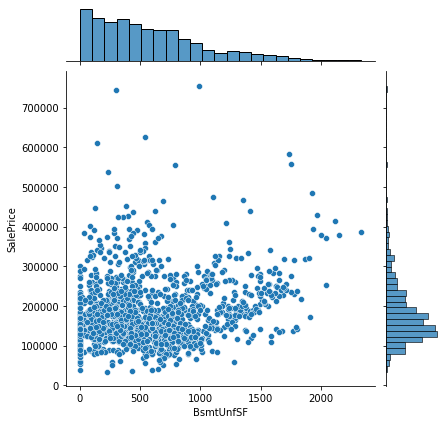

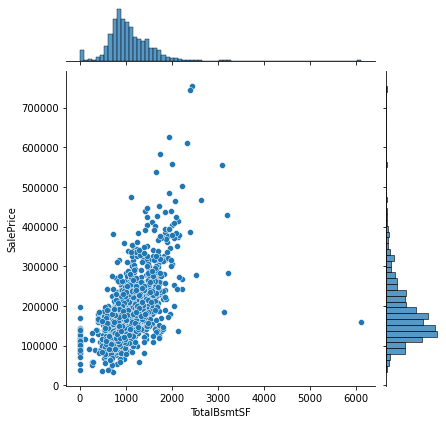

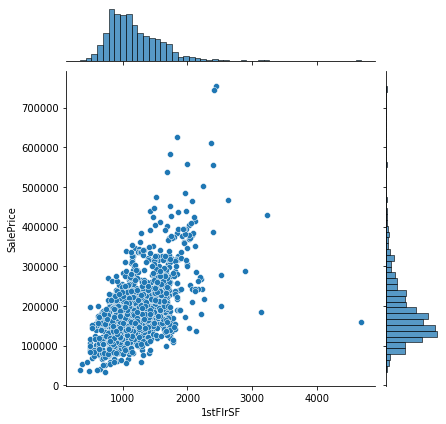

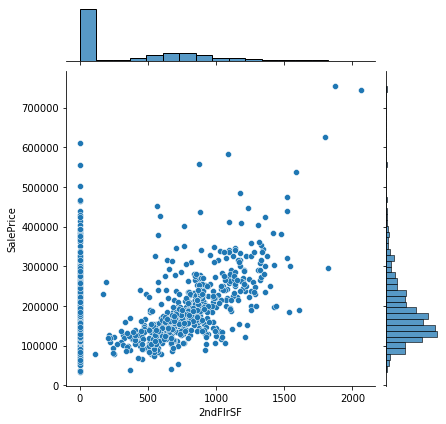

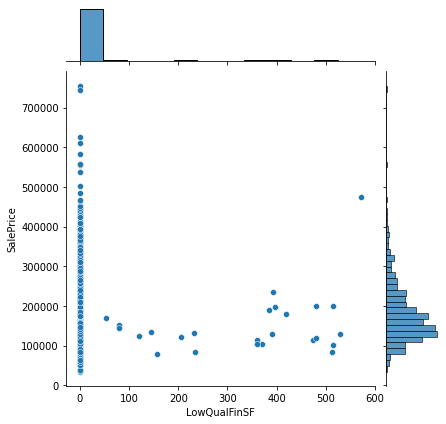

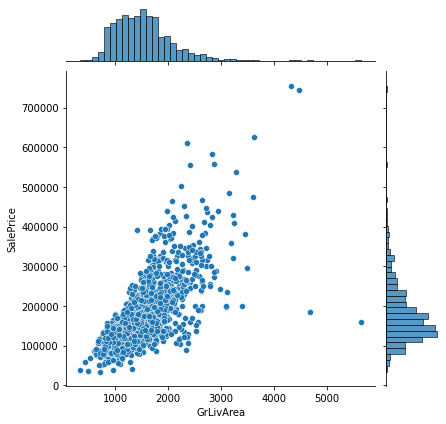

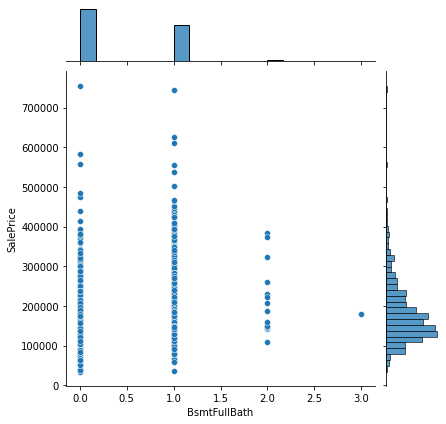

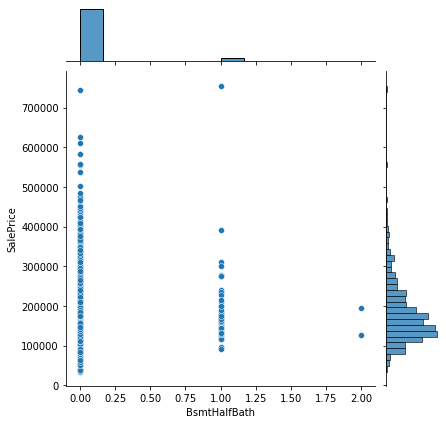

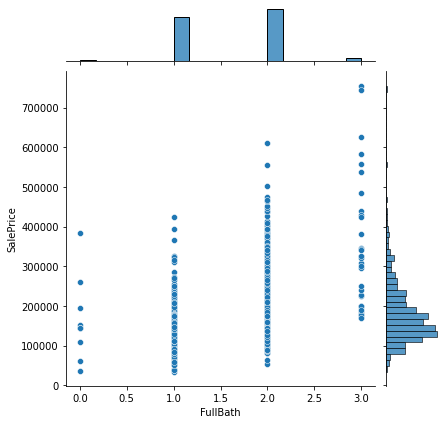

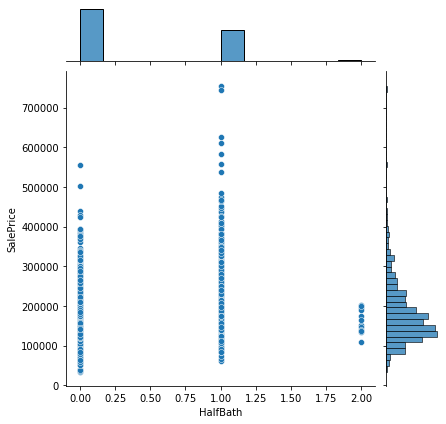

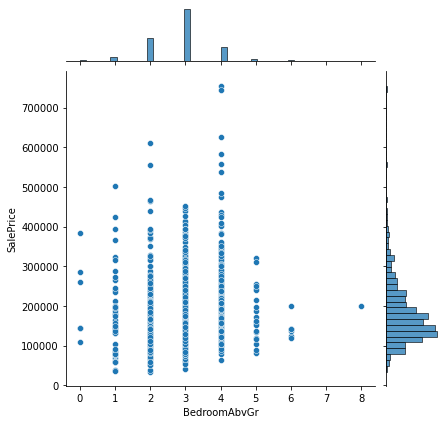

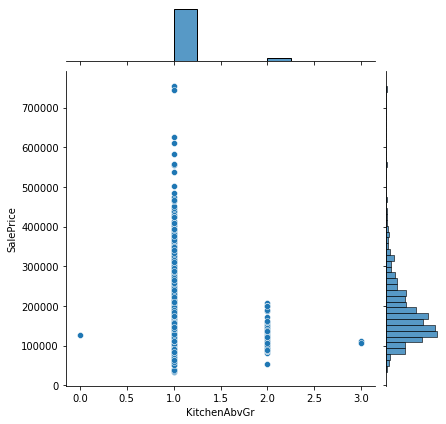

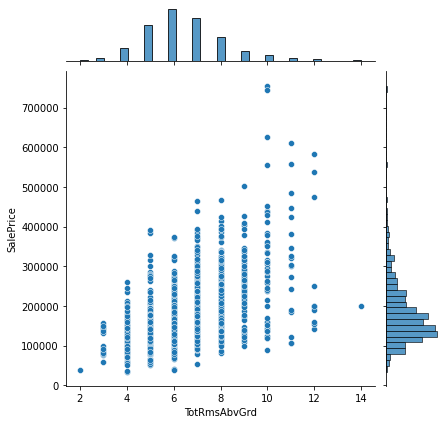

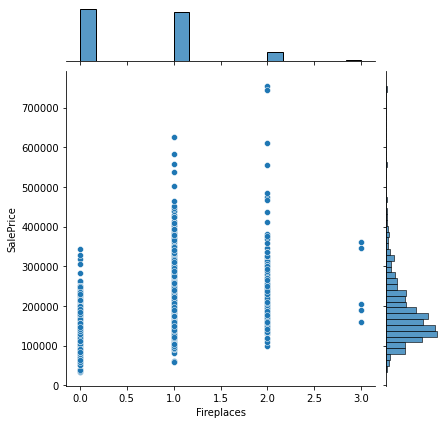

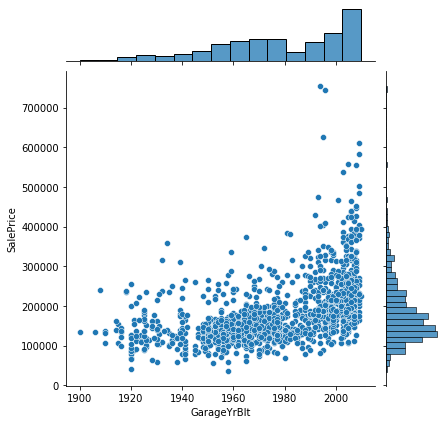

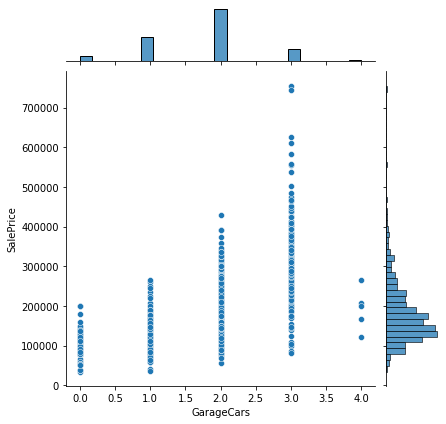

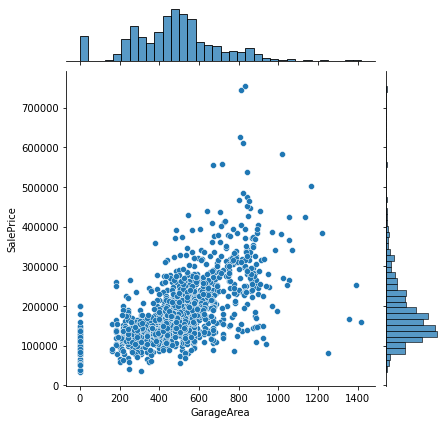

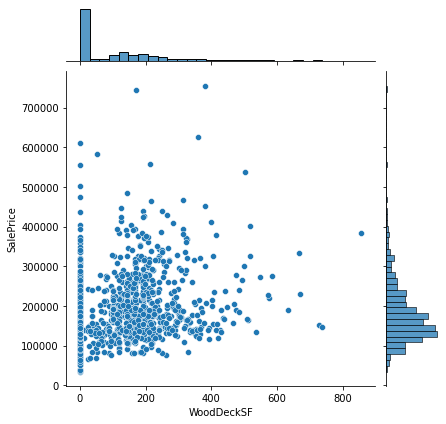

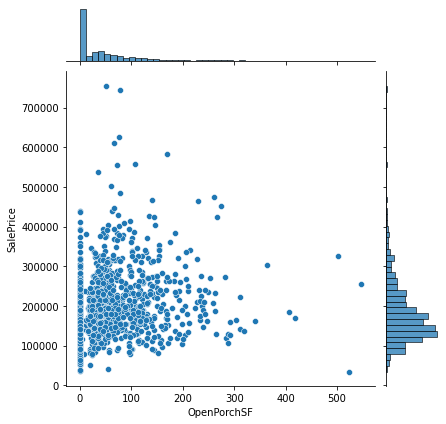

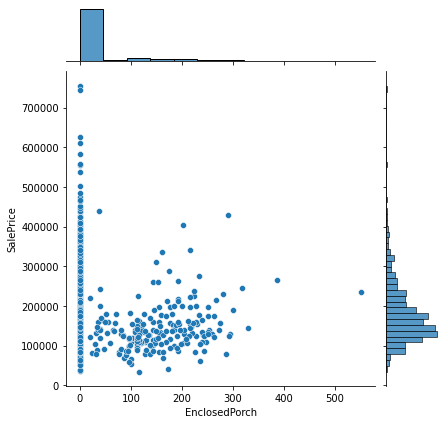

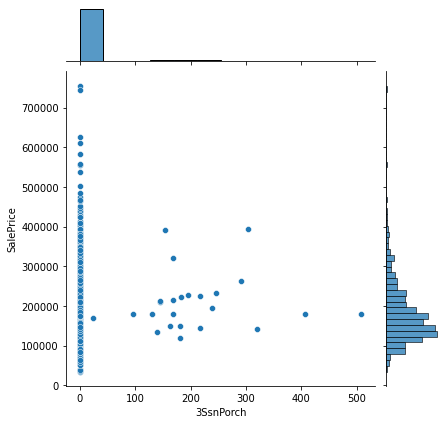

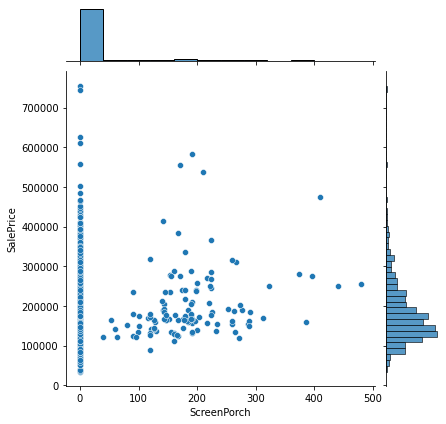

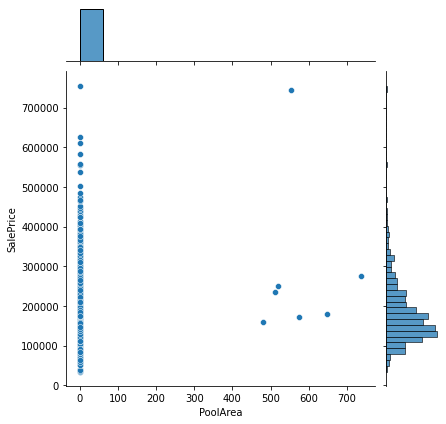

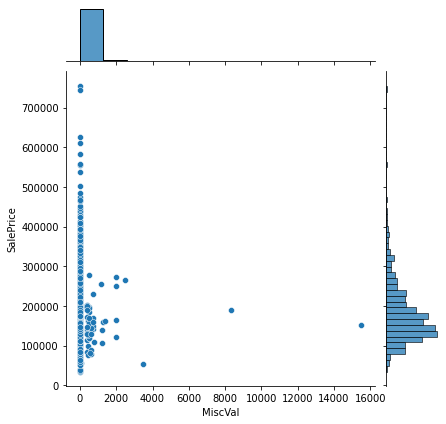

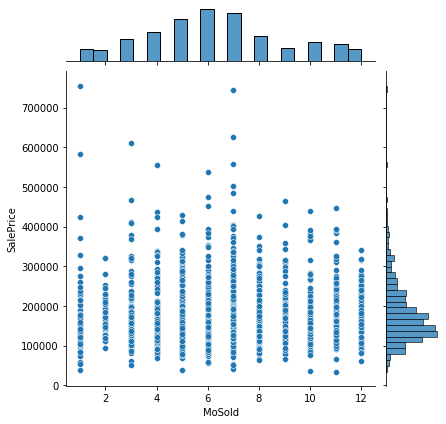

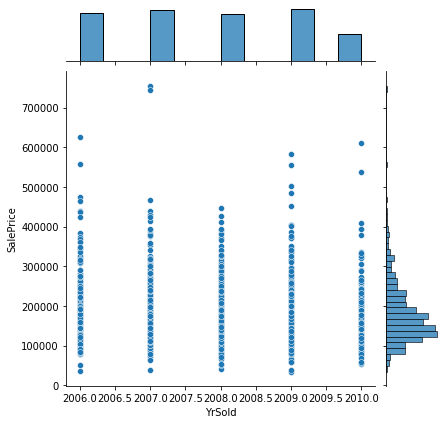

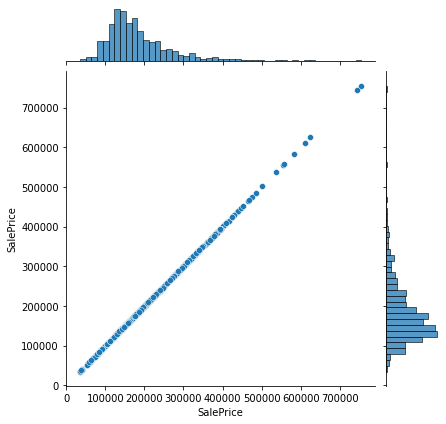

In [46]:
##Visualization
for i, col in enumerate(num.columns):
    plt.figure(i)
    sns.jointplot(x=col ,y="SalePrice", data=num)


  

In [47]:
##Removing 2 rows
df=df[df.BsmtFullBath<2.5]
df=df[df.BedroomAbvGr<7.5]
###Treating the outliers
df.MasVnrArea[df.MasVnrArea>1300]=200
df.BsmtFinSF1[df.BsmtFinSF1>4000]=df.BsmtFinSF1.mean()
df.TotalBsmtSF[df.TotalBsmtSF>5500]=df.TotalBsmtSF.mean()
df["1stFlrSF"][df["1stFlrSF"]>4000]=df["1stFlrSF"].mean()
df.GrLivArea[df.GrLivArea>4000]=df.GrLivArea.median()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcPara

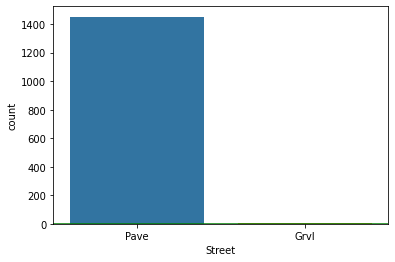

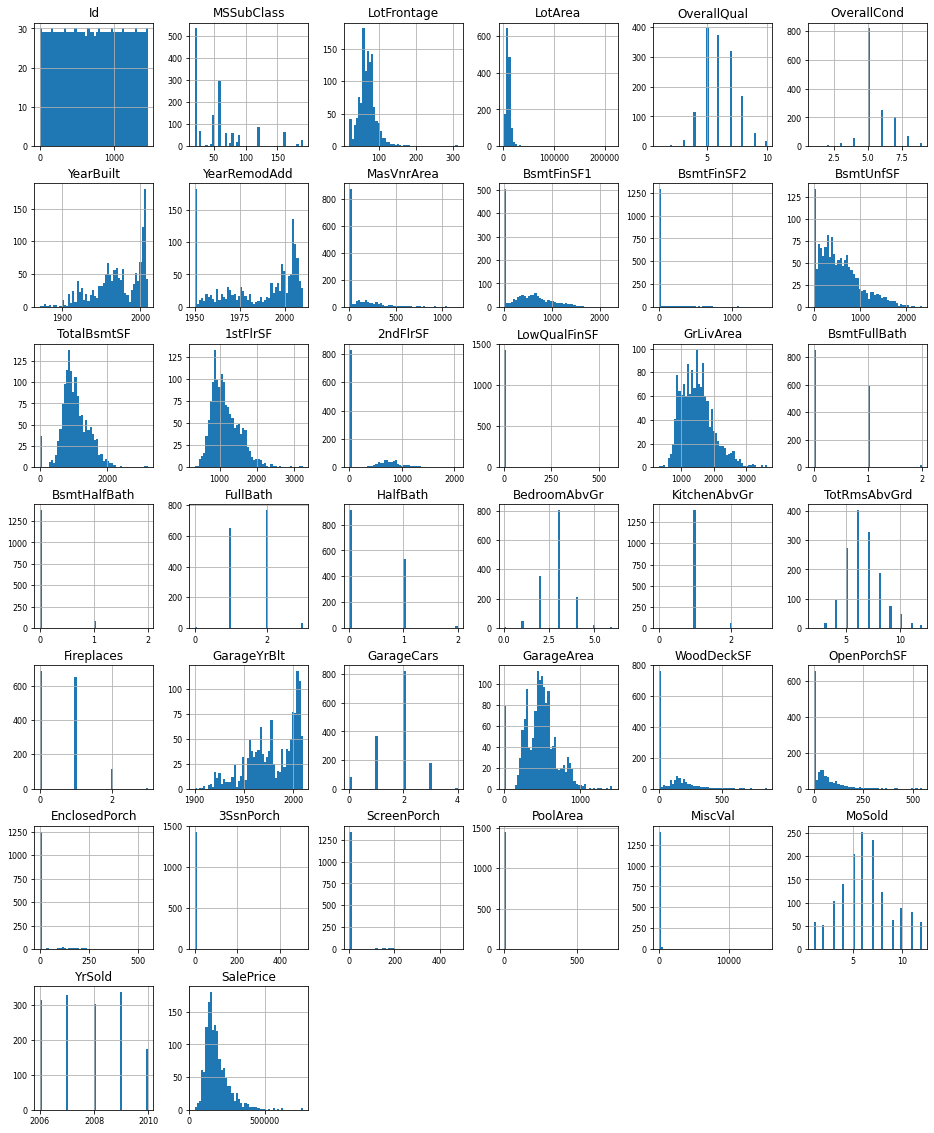

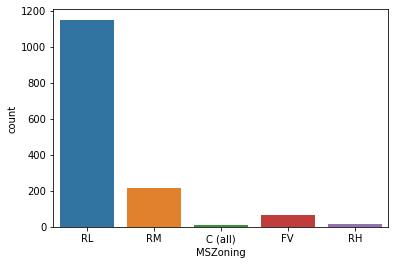

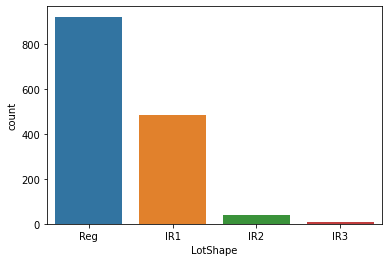

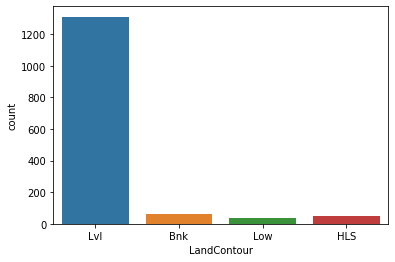

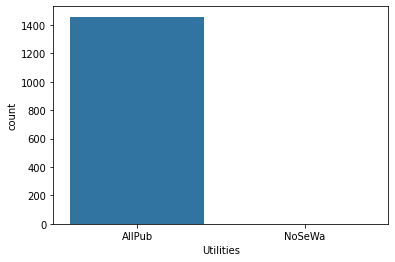

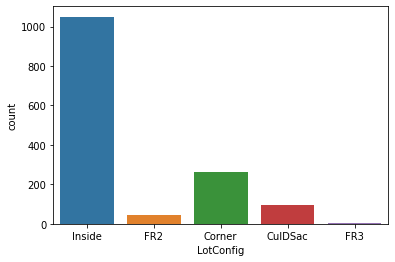

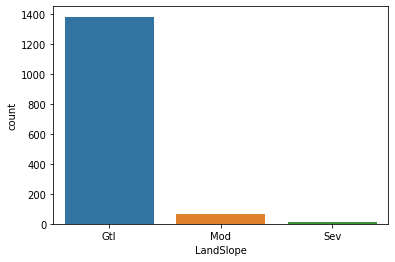

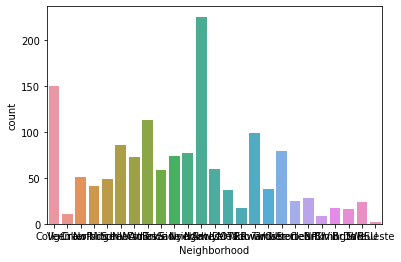

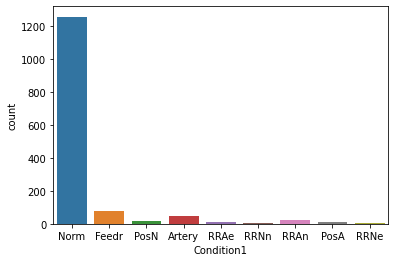

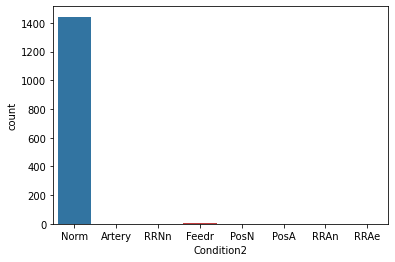

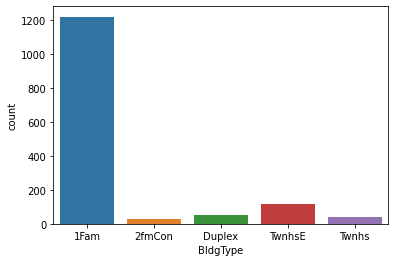

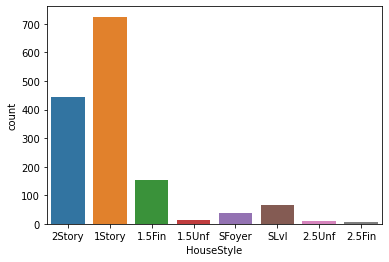

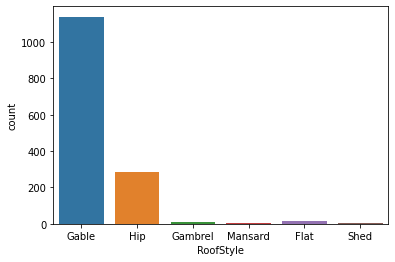

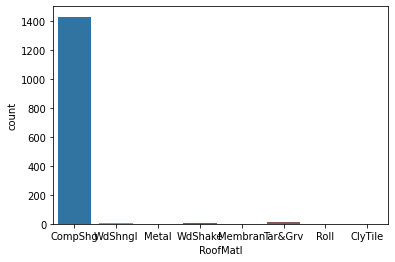

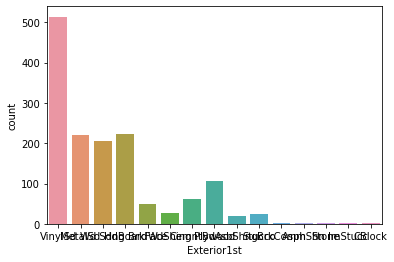

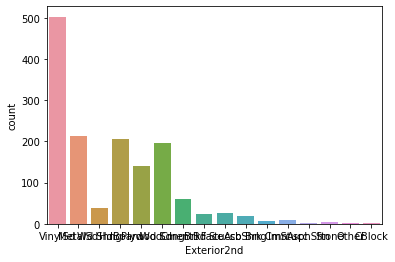

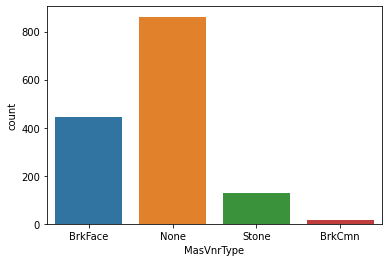

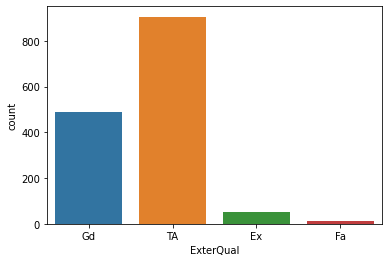

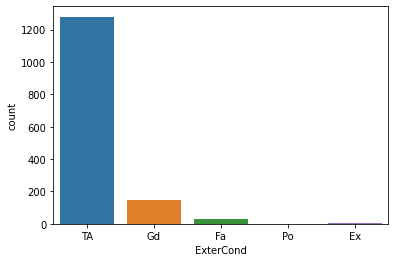

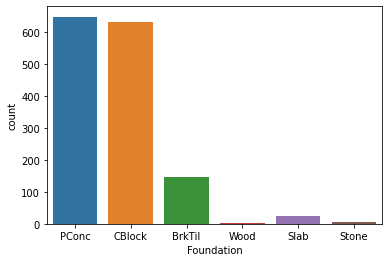

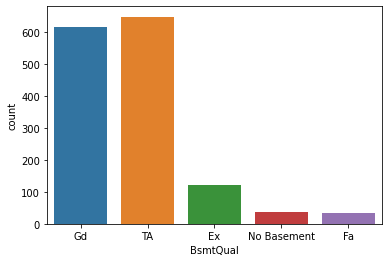

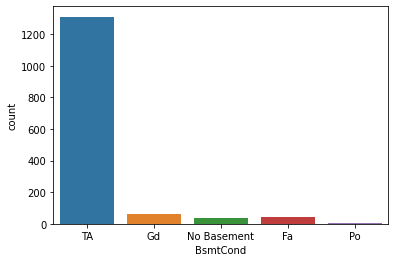

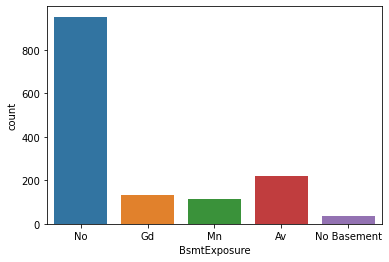

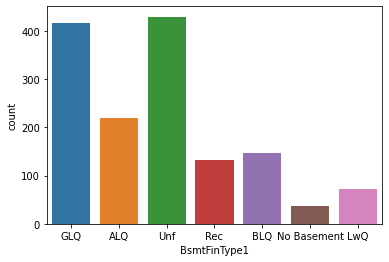

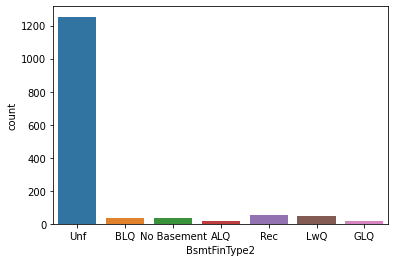

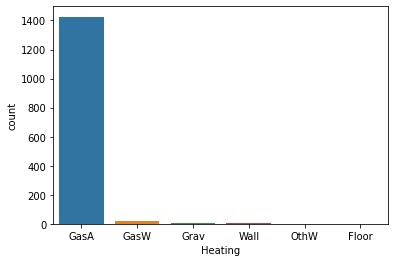

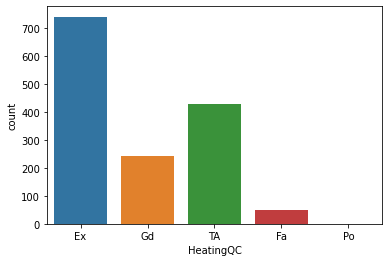

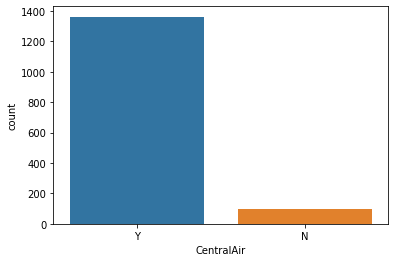

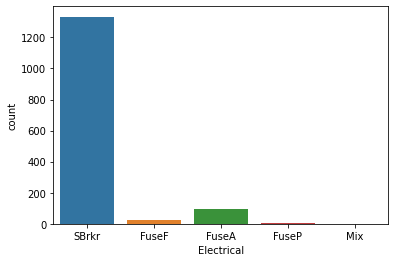

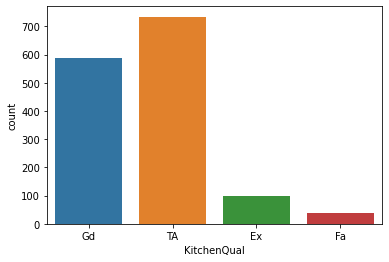

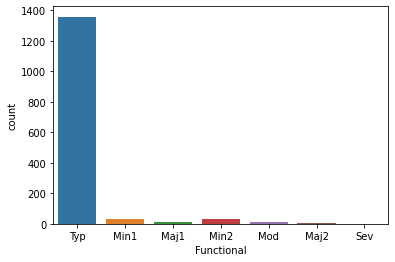

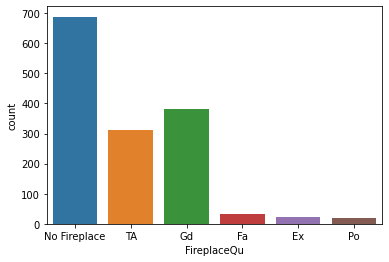

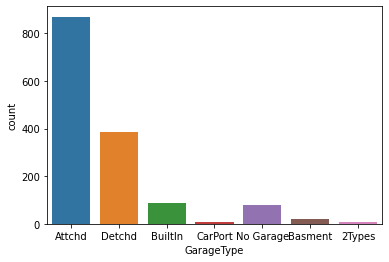

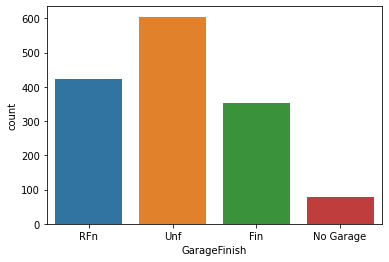

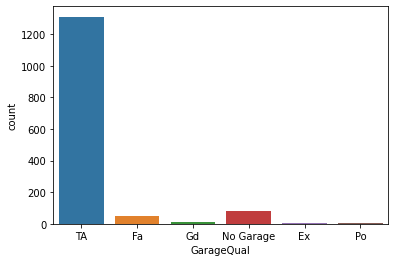

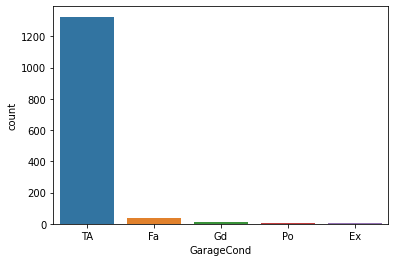

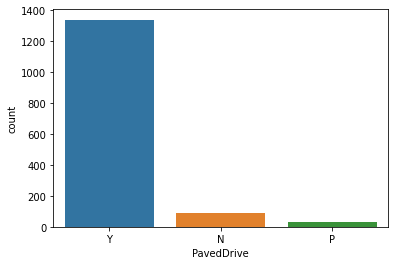

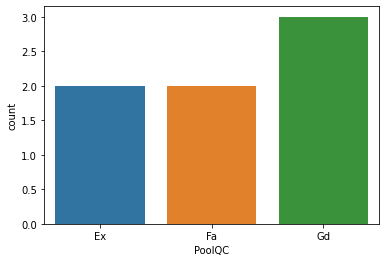

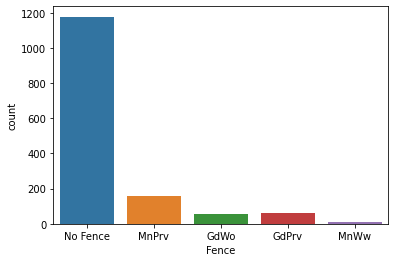

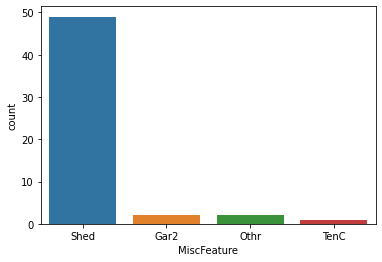

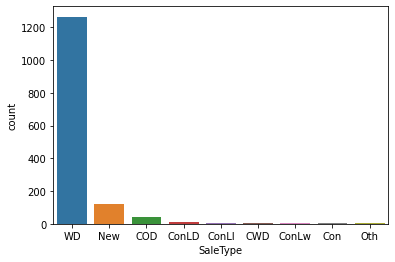

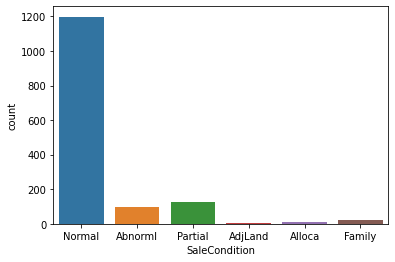

In [48]:
#####Visulaizing training SET
sns.distplot(df['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4});
df_no = df.select_dtypes(include = ['float64', 'int64'])
df_no.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);
df_obj = df.select_dtypes(include = "object")
for i, col in enumerate(df_obj.columns):
    plt.figure(i)
    sns.countplot(x=col, data=df_obj)


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) a

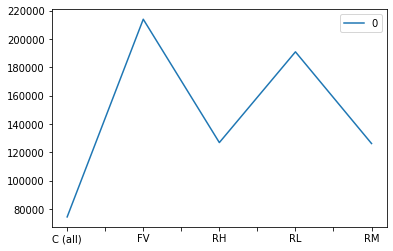

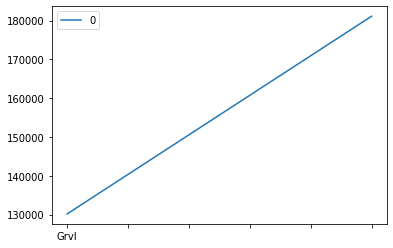

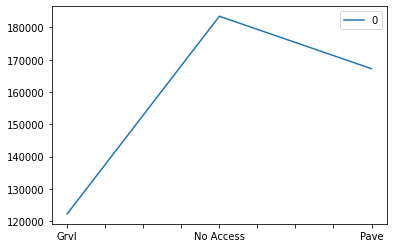

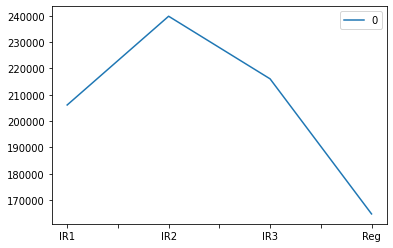

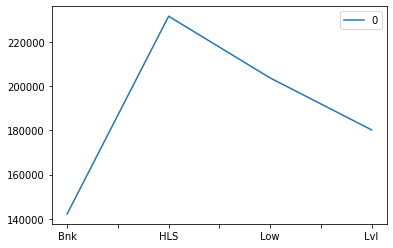

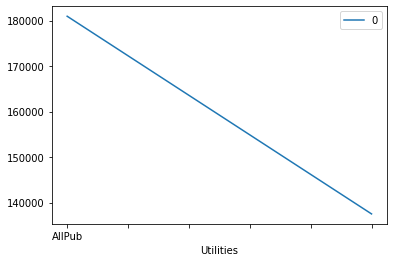

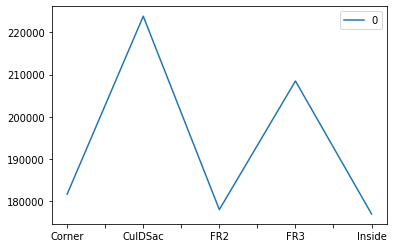

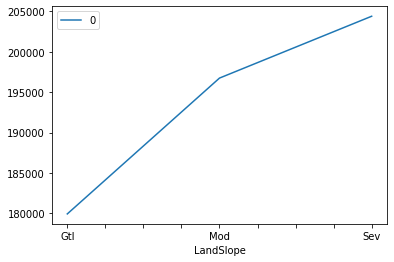

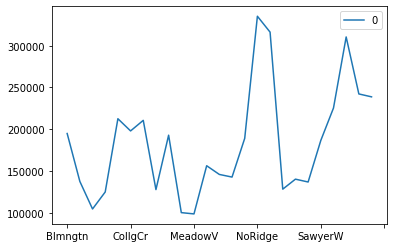

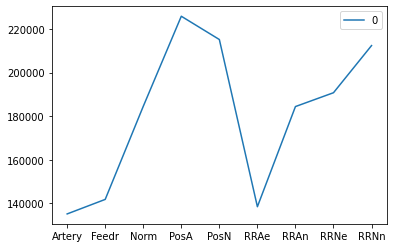

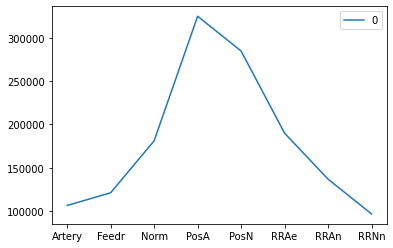

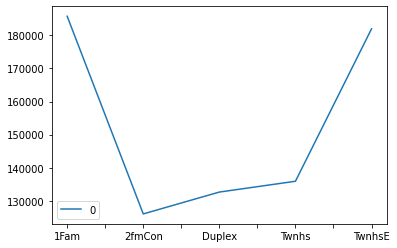

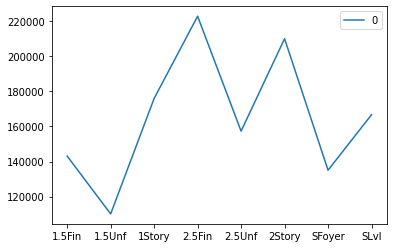

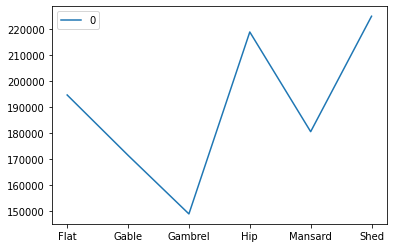

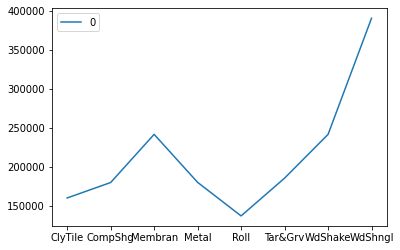

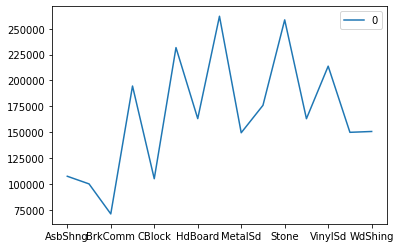

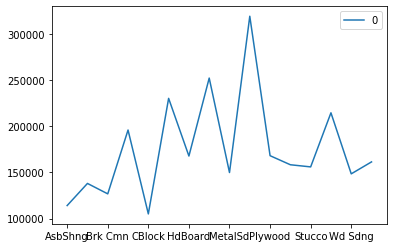

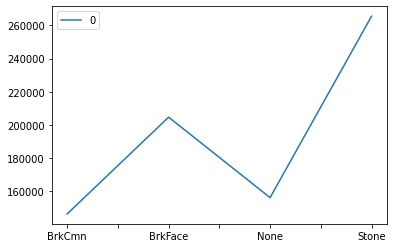

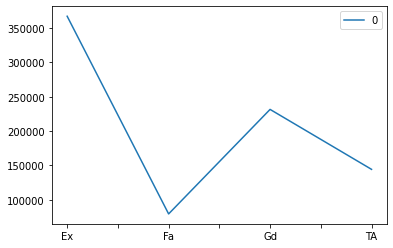

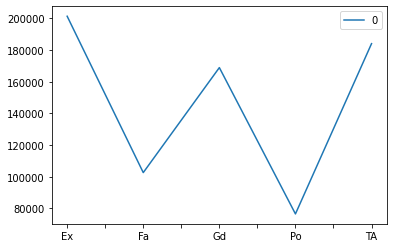

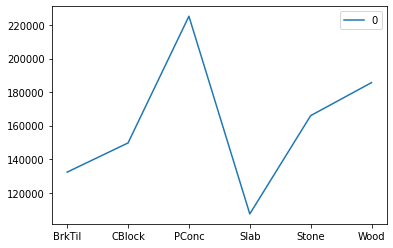

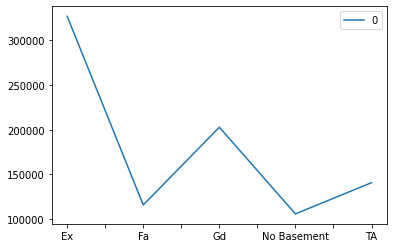

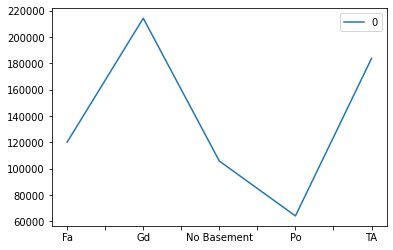

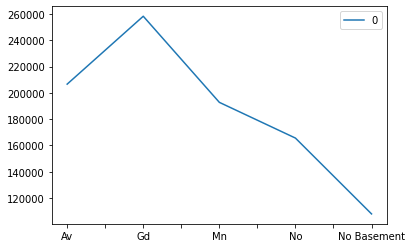

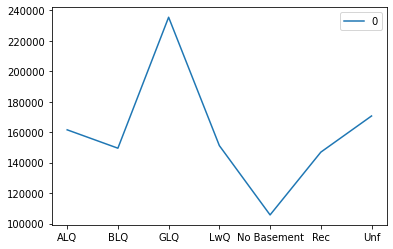

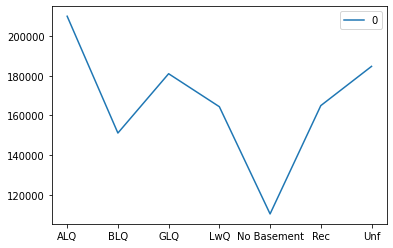

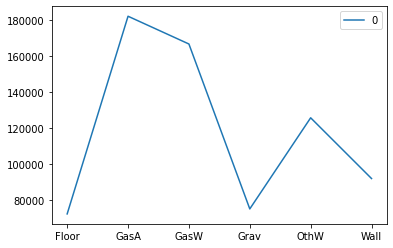

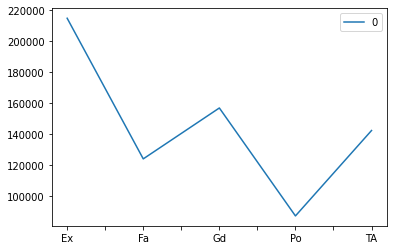

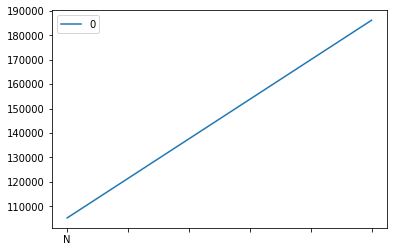

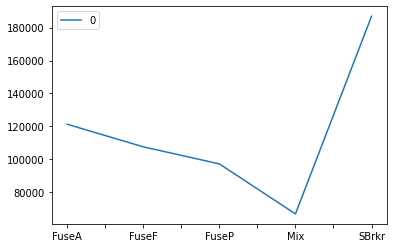

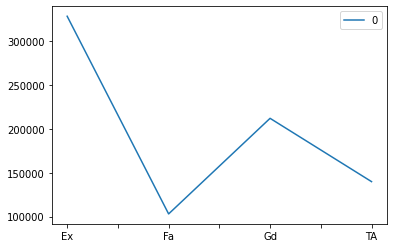

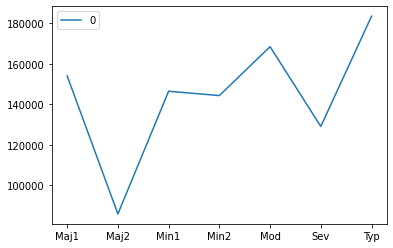

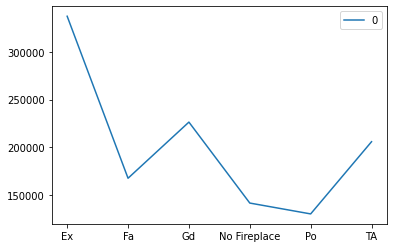

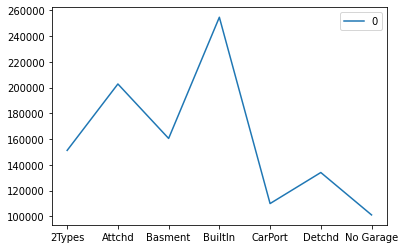

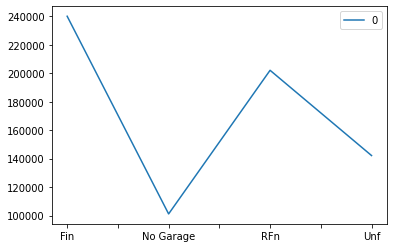

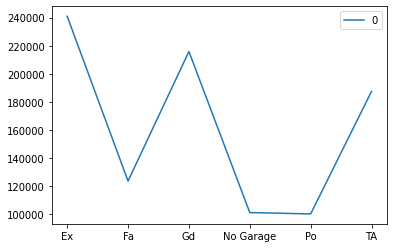

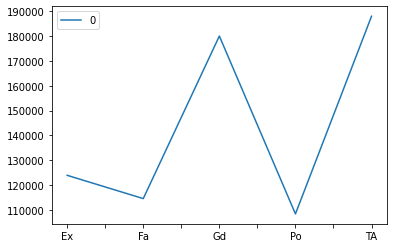

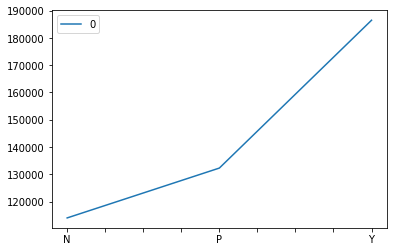

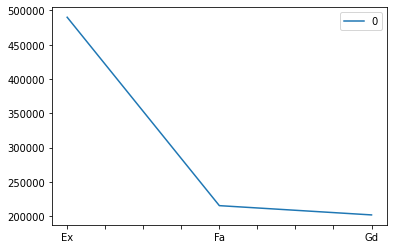

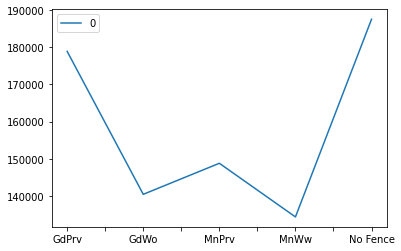

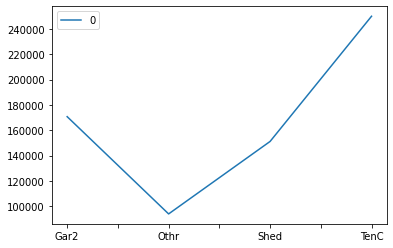

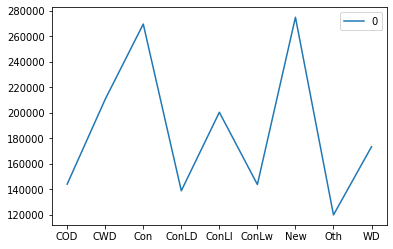

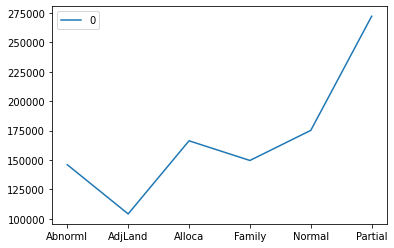

In [49]:
###Average of each categorical factor in each object column contributing to the price of the house
df_obj = df.select_dtypes(include = "object")
for i in df_obj:
  pd.DataFrame(df.SalePrice.groupby(by=df_obj[i]).sum()/df_obj[i].value_counts()).plot()

**Removing rows with NA vlaues**

In [50]:
###Garage built year, garage year cond, mas mas, electrical
#Removing 8 values since it is very less
df=df.dropna(subset=['MasVnrType'])


**Coeffecient of correlation**

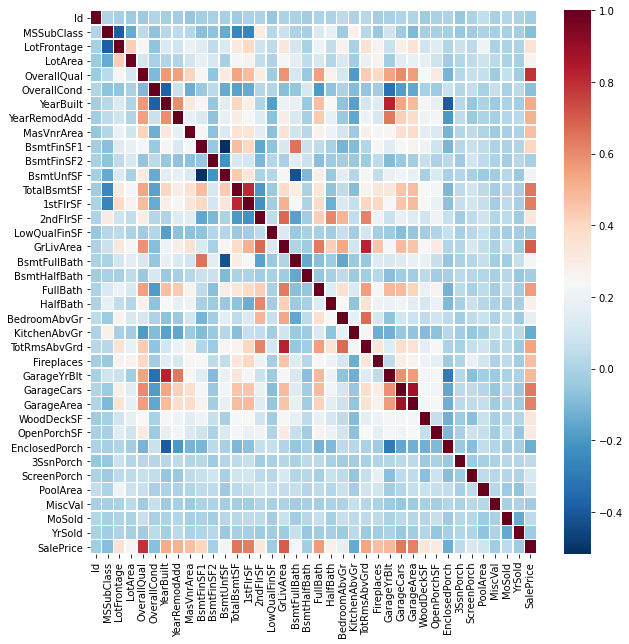

In [51]:
pearsoncorr = df.corr(method='pearson')
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            linewidth=0.5,
            ax=ax)

**Removing insignificant variables**

In [52]:
df=df.drop(["LotArea","BsmtFinSF2","LowQualFinSF","WoodDeckSF","EnclosedPorch","3SsnPorch","ScreenPorch","PoolArea","LotFrontage","Id","GarageYrBlt","GarageCond","PoolQC","RoofMatl","MiscFeature","Electrical","Heating","Utilities","MiscVal","Condition2","Street","CentralAir"], axis=1)

In [53]:
x_train=df.drop(['SalePrice'], axis=1)
y_train=df['SalePrice']
x_train.isnull().sum()
x_train.shape



(1450, 58)

In [54]:
x_train = pd.get_dummies(x_train,columns=x_train.select_dtypes(include=['object']).columns,drop_first=True)

In [55]:
x_train.shape

(1450, 210)

In [56]:
df0=pd.read_csv("test.csv")
ID=df0["Id"]
df0=df0.drop(["LotArea","BsmtFinSF2","LowQualFinSF","WoodDeckSF","EnclosedPorch","3SsnPorch","ScreenPorch","PoolArea","LotFrontage","Id","GarageYrBlt","GarageCond","PoolQC","RoofMatl","MiscFeature","Electrical","Heating","Utilities","MiscVal","Condition2","Street","CentralAir"], axis=1)
df0.shape

(1459, 58)

In [57]:
df0["Alley"].fillna("No Access", inplace = True)
df0["FireplaceQu"].fillna("No Fireplace", inplace = True)
df0["BsmtQual"].fillna("No Basement", inplace = True)
df0["BsmtCond"].fillna("No Basement", inplace = True)
df0["BsmtExposure"].fillna("No Basement", inplace = True)
df0["BsmtFinType1"].fillna("No Basement", inplace = True)
df0["BsmtFinType2"].fillna("No Basement", inplace = True)
df0["GarageType"].fillna("No Garage", inplace = True)
df0["GarageFinish"].fillna("No Garage", inplace = True)
df0["GarageQual"].fillna("No Garage", inplace = True)
df0["Fence"].fillna("No Fence", inplace = True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_

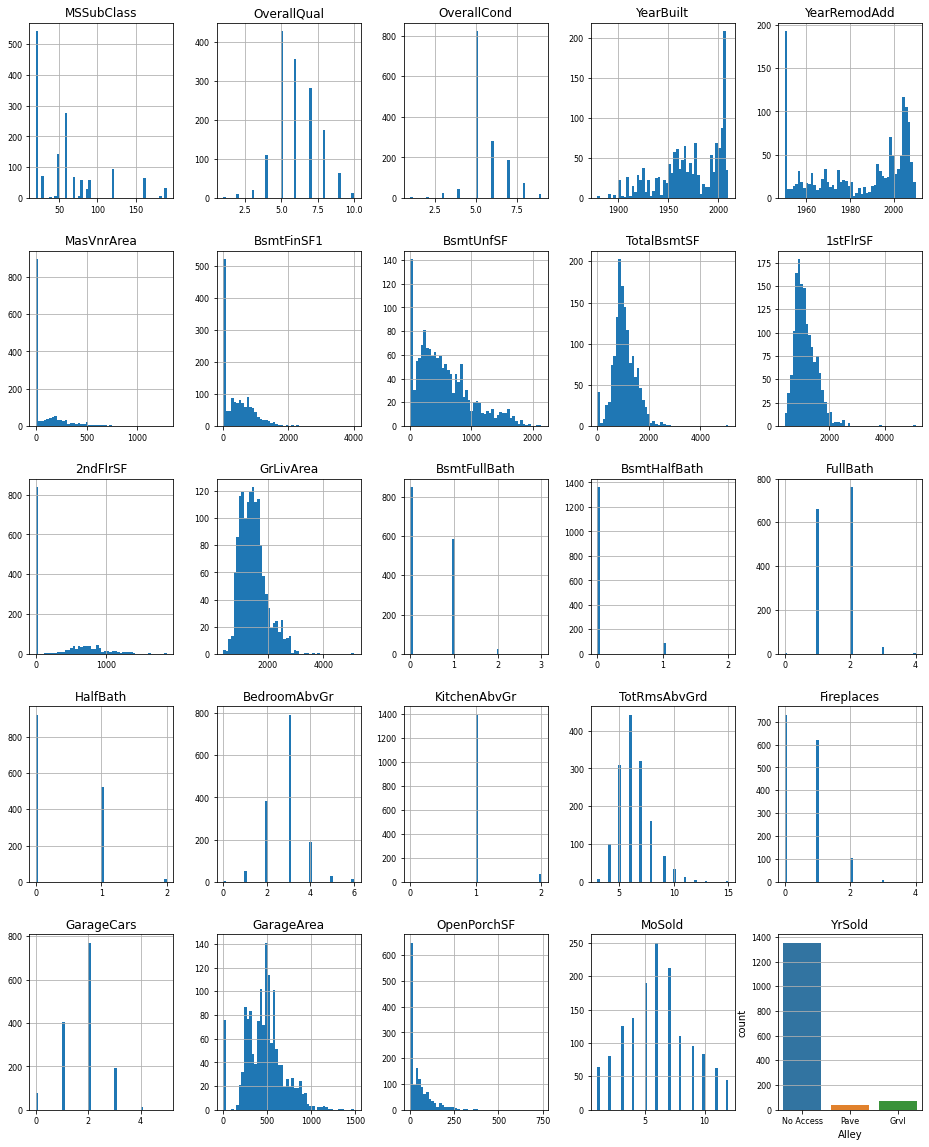

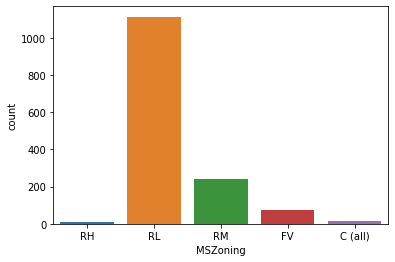

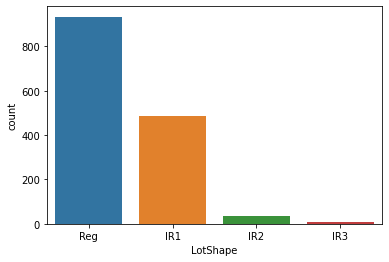

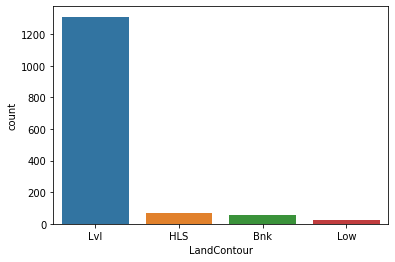

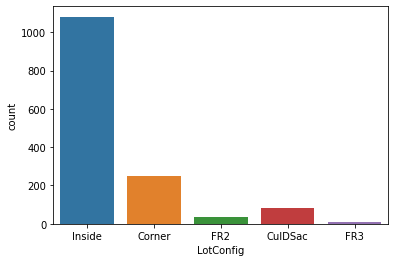

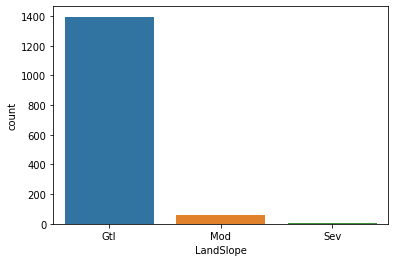

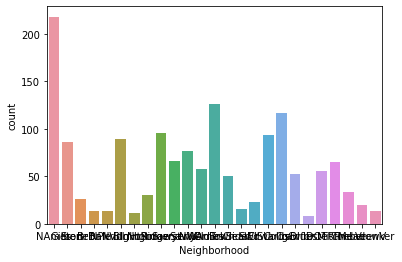

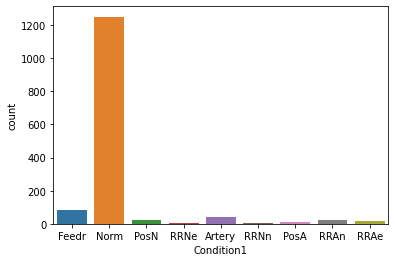

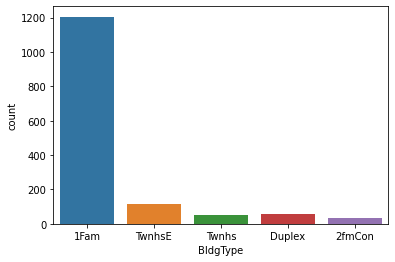

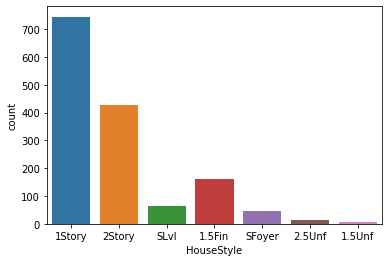

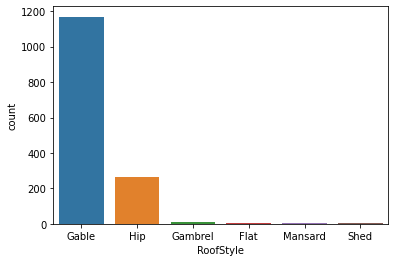

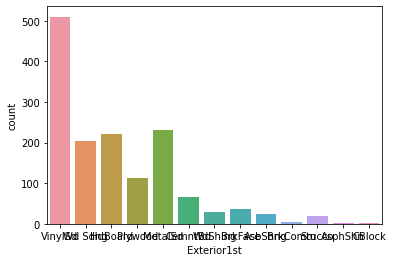

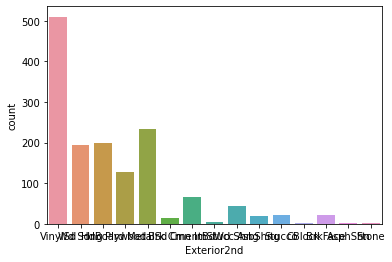

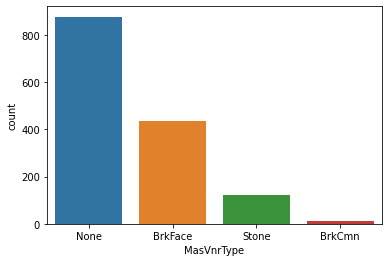

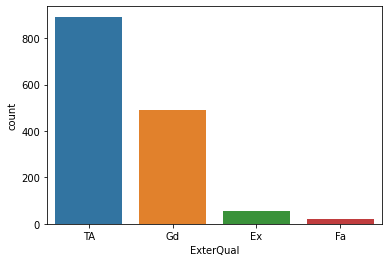

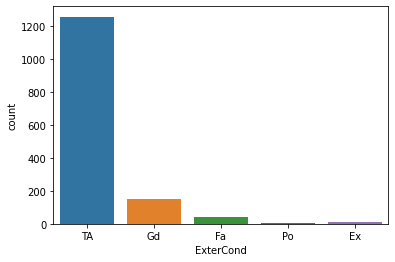

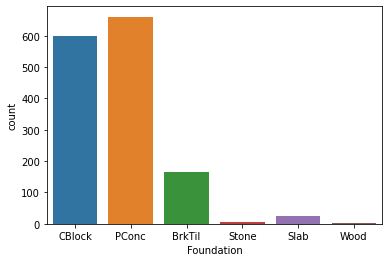

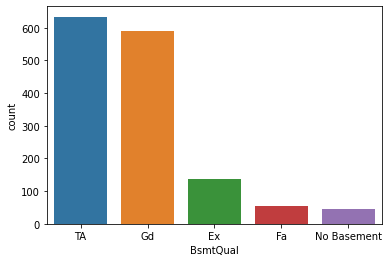

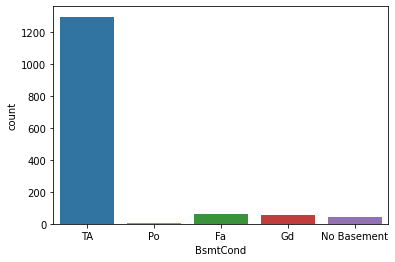

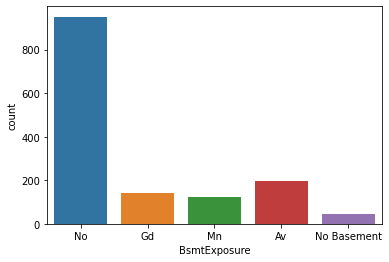

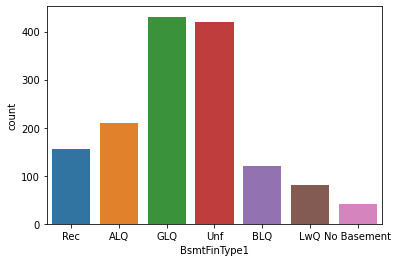

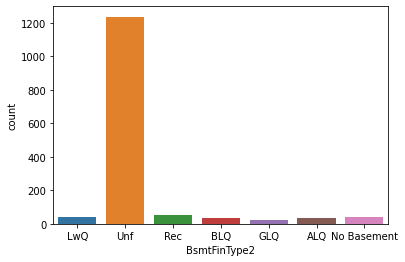

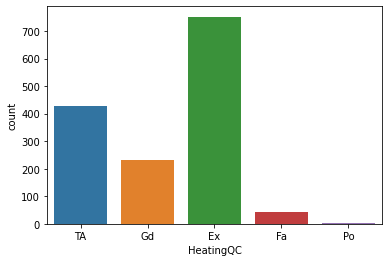

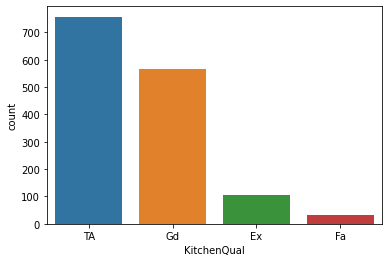

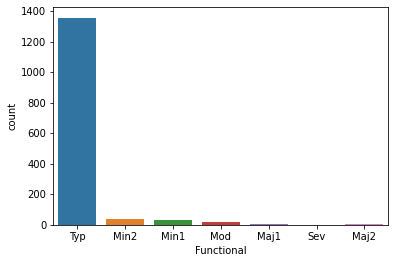

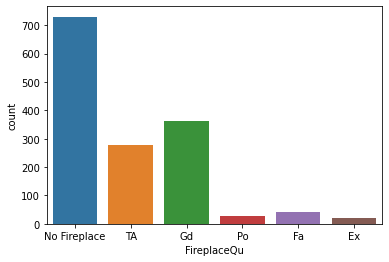

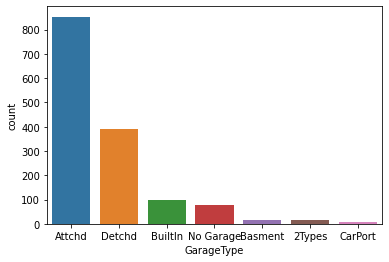

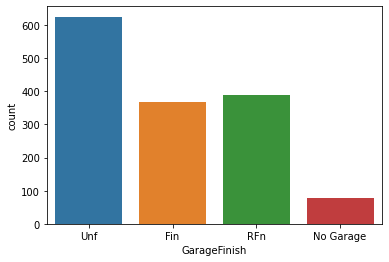

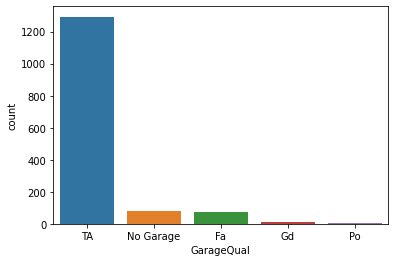

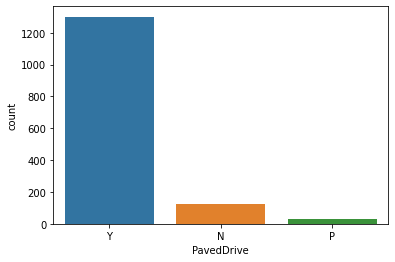

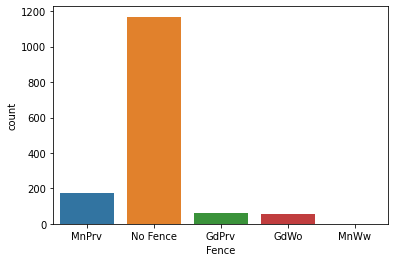

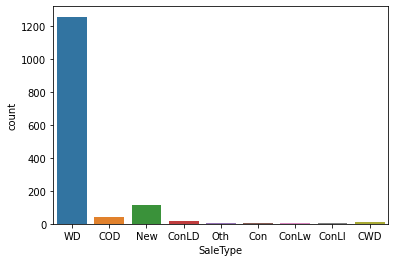

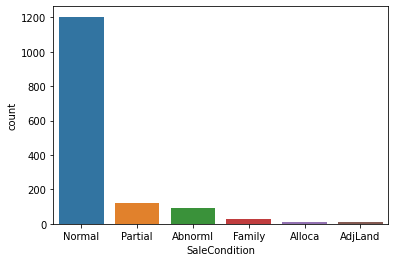

In [58]:
#####Visulaizing training SET
df0.select_dtypes(include = ['float64', 'int64']).hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);
df_obj1 = df0.select_dtypes(include = "object")
for i, col in enumerate(df_obj1.columns):
    plt.figure(i)
    sns.countplot(x=col, data=df_obj1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1559: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f = plt.figure(figsize=(height, height))
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1559: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figu

<Figure size 432x288 with 0 Axes>

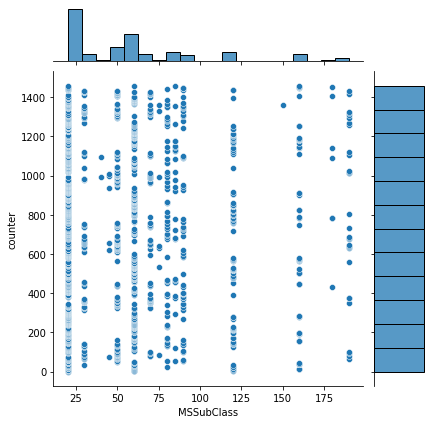

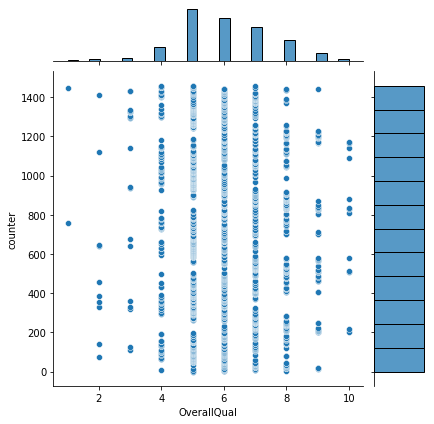

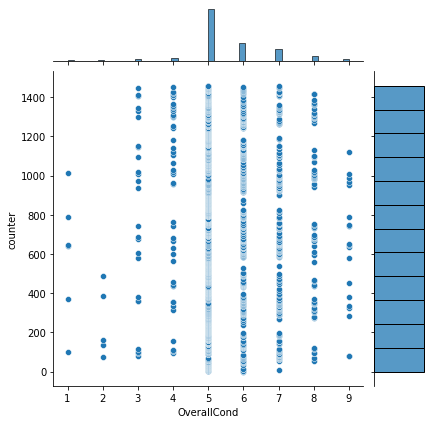

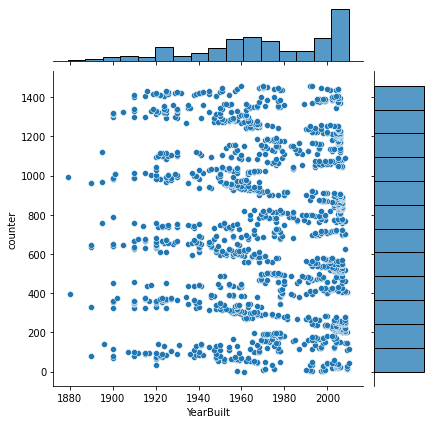

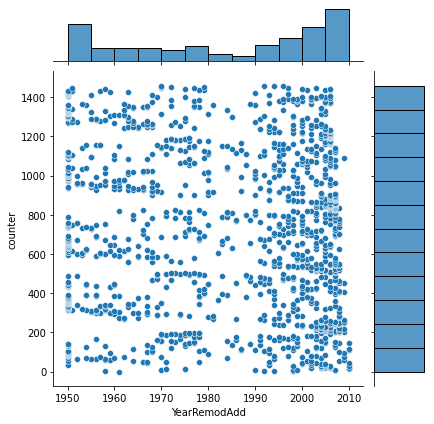

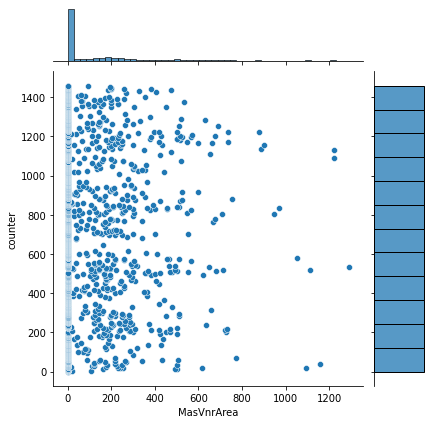

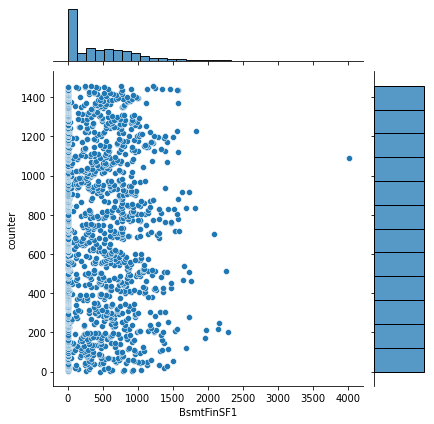

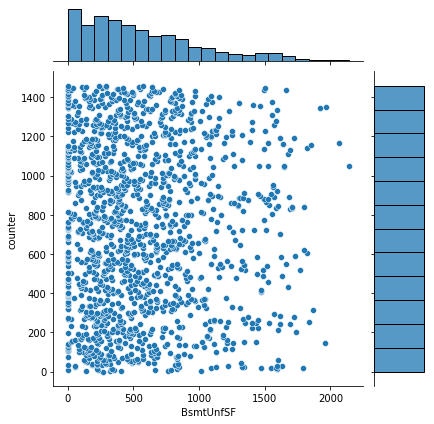

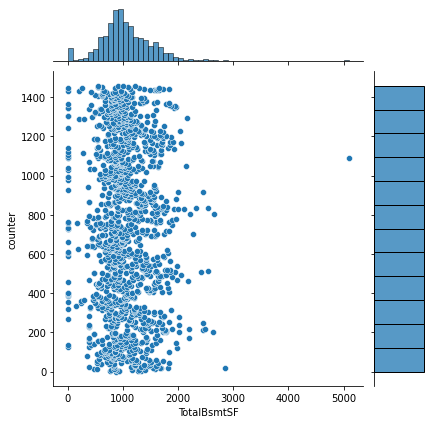

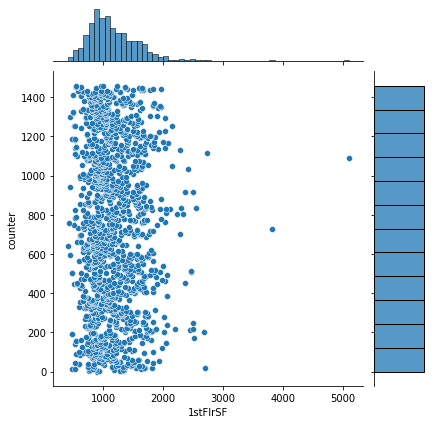

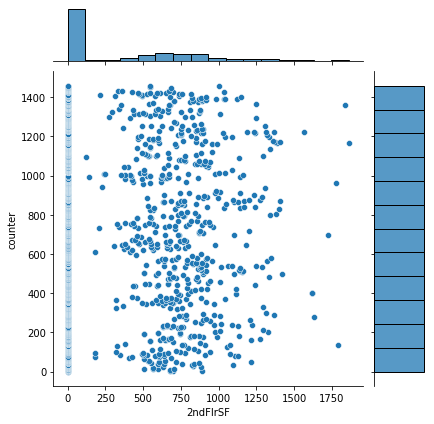

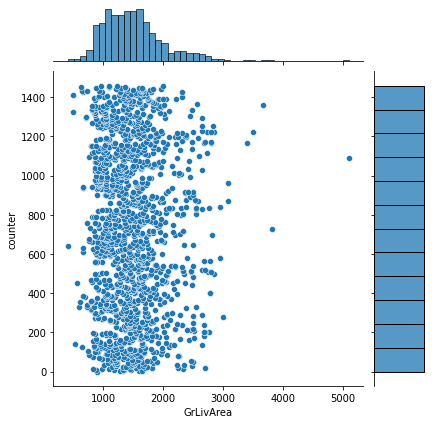

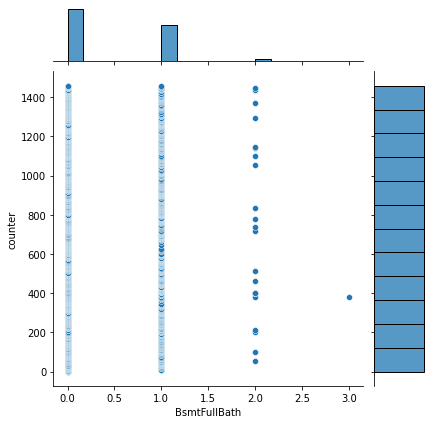

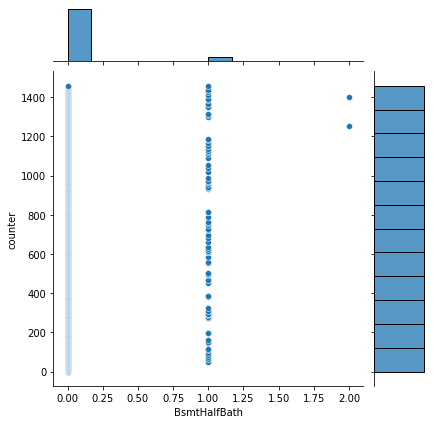

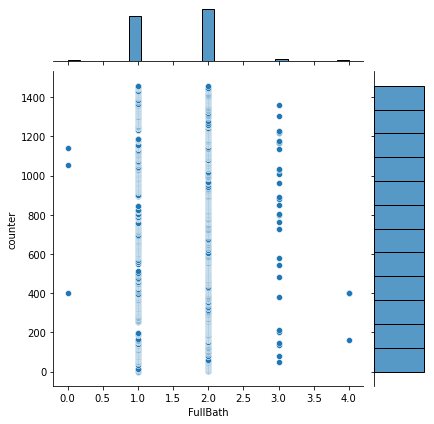

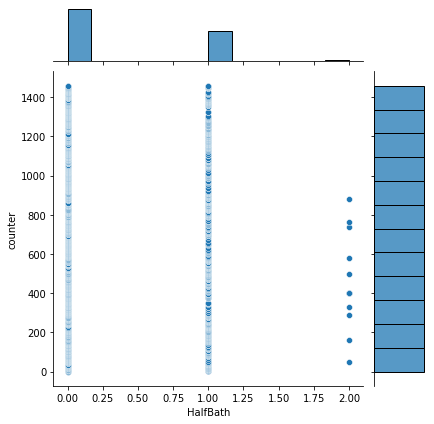

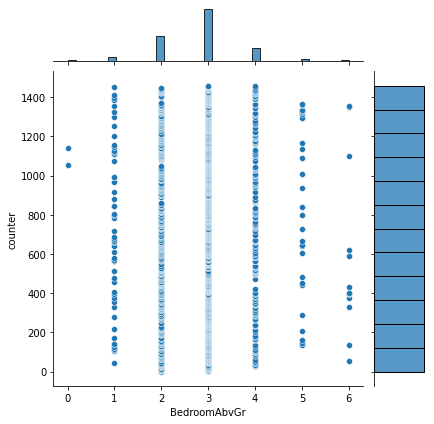

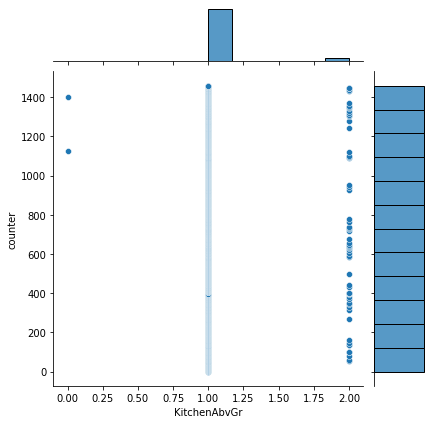

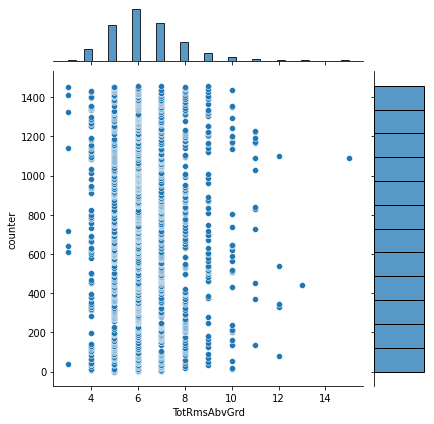

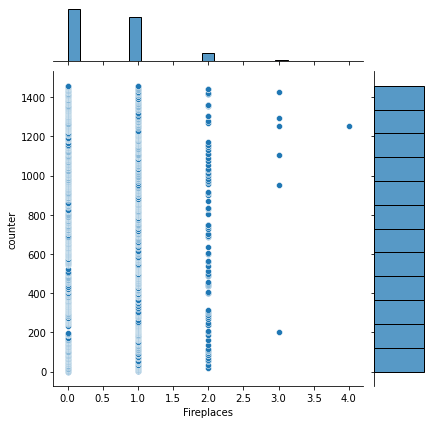

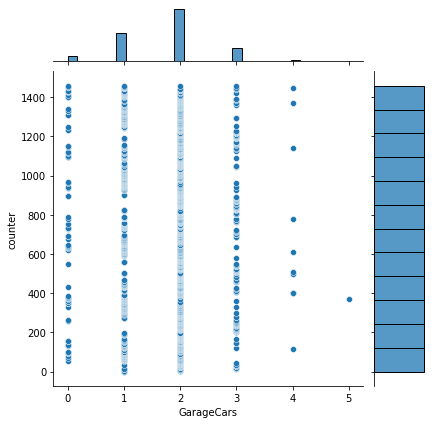

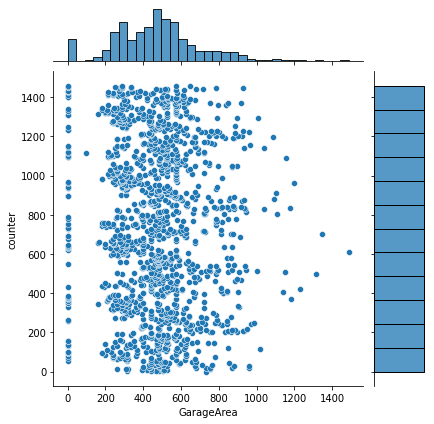

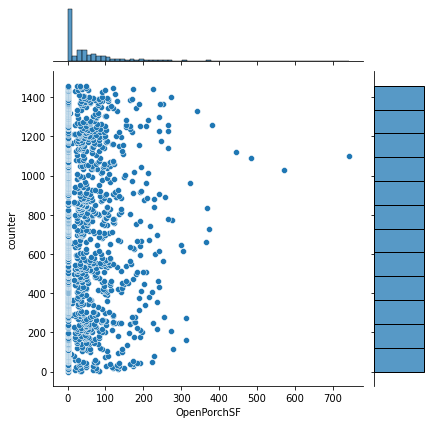

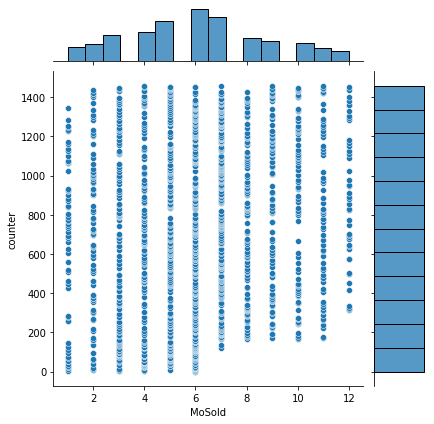

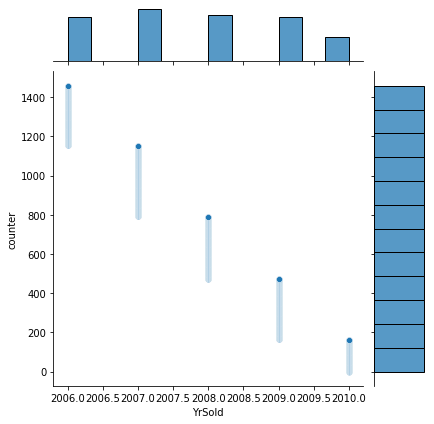

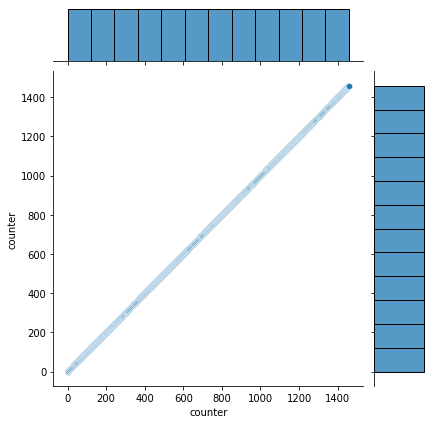

In [59]:
##Visualization
num1=df0.select_dtypes(include=['int64','float64'])
num1['counter'] = range(len(num1))
for i, col in enumerate(num1.columns):
  plt.figure(i)
  sns.jointplot(x=col ,y="counter", data=num1)

**Treating Outliers**

In [60]:
df0.BsmtFinSF1[df0.BsmtFinSF1>3500]=df0.BsmtFinSF1
df0.TotalBsmtSF[df0.TotalBsmtSF>3500]=df0.TotalBsmtSF.mean()
df0["1stFlrSF"][df0["1stFlrSF"]>3500]=df0["1stFlrSF"].median()
df0.GrLivArea[df0.GrLivArea>4000]=df0.GrLivArea.mean()
df0.BsmtFullBath[df0.BsmtFullBath>2.5]=2
df0.BsmtHalfBath[df0.BsmtHalfBath>1.5]=1
df0.FullBath[df0.FullBath>2.5]=2
df0.TotRmsAbvGrd[df0.TotRmsAbvGrd>12.2]=df0.TotRmsAbvGrd.median()
df0.Fireplaces[df0.Fireplaces>3.5]=df0.Fireplaces.median()
df0.GarageCars[df0.GarageCars>4.2]=df0.GarageCars.median()
df0.OpenPorchSF[df0.OpenPorchSF>510]=df0.OpenPorchSF.mean()




/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid 

**Treating NA values**

In [61]:
#####Treating NA values
df0["MasVnrArea"].describe()
##Filling NA with average of median an mean 137
df0["MasVnrArea"].fillna(137, inplace = True)
##MasVnrType NA Values
df0["MasVnrType"].value_counts()
df0["MasVnrType"].fillna("None", inplace = True)
######Mz zoning
df0["MSZoning"].value_counts()
df0["MSZoning"].fillna("RL", inplace = True)
###Utilities
df0["Exterior1st"].value_counts()
df0["Exterior1st"].fillna("VinylSd", inplace = True)
####Exterior 2nd
df0["Exterior2nd"].value_counts()
df0["Exterior2nd"].fillna("VinylSd", inplace = True)
###Basmt
df0["BsmtFinSF1"].fillna(370, inplace = True)
df0["BsmtUnfSF"].fillna(0, inplace = True)
df0["TotalBsmtSF"].fillna(1000, inplace = True)
###BsmtFullBath
df0["BsmtHalfBath"].value_counts()
df0["BsmtFullBath" ].fillna(1, inplace = True)
df0["BsmtHalfBath" ].fillna(1, inplace = True)
#####KitchenQual
df0["KitchenQual"].value_counts()
df0["KitchenQual"].fillna("TA", inplace = True)
####Functional
df0["Functional"].value_counts()
df0["Functional"].fillna("Typ", inplace = True)
###GarageCars      

df0["GarageCars"].fillna(1, inplace = True)
df0["GarageArea"].fillna(250, inplace = True)

###Sale TYPE
df0["SaleType"].value_counts()
df0["SaleType"].fillna("WD", inplace = True)

In [62]:
x_test=df0

In [63]:
x_test = pd.get_dummies(x_test,columns=x_test.select_dtypes(include=['object']).columns,drop_first=True)
x_test.shape

(1459, 205)

In [64]:
#Checking Missing factors in test set 
set(x_train.columns).difference(x_test.columns) 

{'Exterior1st_ImStucc',
 'Exterior1st_Stone',
 'Exterior2nd_Other',
 'GarageQual_Fa',
 'HouseStyle_2.5Fin'}

In [65]:
###Adding missing columns with 0 values
x_test["Exterior1st_Stone"]=0
x_test["Exterior2nd_Other"]=0 
x_test["Exterior1st_ImStucc"]=0    
x_test["GarageQual_Fa"]=0 
x_test["HouseStyle_2.5Fin"]=0       


In [66]:
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor(n_estimators=100)
regressor.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [67]:
pred1=regressor.predict(x_test)
pred1 = pd.DataFrame({'Id': ID, 'SalePrice': pred1})

In [68]:
###XGBoost
from xgboost import XGBRegressor
xg=XGBRegressor()
xg.fit(x_train.values,y_train.values)

[04:53:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [69]:
pred2=xg.predict(x_test.values)
pred2= pd.DataFrame({'Id': ID, 'SalePrice': pred2})

**Best results**

In [70]:
b=(pred1.SalePrice+pred2.SalePrice)/2
final2 = pd.DataFrame({'Id': ID, 'SalePrice':b })
final2.to_csv("best2.csv")